## Experimental Boxing data review.ipynb

This notebook contains a review of the (thus far) collected boxing data. Here we inspect the data, perform preprocessing and conduct primary analysis and visualizations. </br>

Eight continuous data measurements were taken, (almost) all of them containing 300 seconds of data measuring up to 150 punches per dataset. Except for the control measurements which meant standing still and moving sligthly without throwing any punches. 

The following features were extrated from *Phyphox* app. 
- Rotation on the x-axis
- Rotation on the y-axis
- Rotation on the z-axis
- Acceleration on the x-axis
- Acceleration on the y-axis
- Acceleration on the z-axis
- Proximity (an experimental measurement which we shan't use)

We decided to exclude barometer as this measures air pressures in Pascal, which is not interesting in the cause of our experiment since we're collecting biometric data. 

![image.png](attachment:fe40c59d-a68b-431e-9f55-204343da9c7f.png)

</br>All Rotation and Acceleration datasets were collected at a sampling rate of **50Hz** (50Hz means that mobile device collects 50 datapoints per second). The decision was made due to the following reasons as the follows:
- Professional (right handed) boxers take 60-100ms to throw a jab; 150-200ms to throw a cross and other punches;
- Considering the fact that we are hobby-level boxers, it will take us (and other junior boxers) a slightly longer time to throw punches;
- This, we assume that it will take us approximately 250ms to throw a punch. Ideally, a sampling frequency of 250Hz shall be able to record a punching behavior whti a high temopral resolution (1ms/datapoint); however, this will result in millions of datapoints which is computationally expensive. Alternatively, we balance this by reducing the temporai resolution to 5ms/datapoint ->50Hz
- According to **Nyquist Shannon Sampling Theorem**, the sampling rate must be twice the analog bandwidth of the incoming signal to record a full-scale event including possible buffers (e.g.: few seconds to reposition your arm). We take twice of the 25Hz -> 50Hz.

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# Change the filepath and dirpath accordingly to the location of datasets on your own device 

# For naming convenience:
# lh -> Lead Hook
# rh -> Rear Hook
# lu -> Lead Uppercut
# ru -> Rear Uppercut
# acc -> Acceleration
# gyr -> Gyroscope (rotation)
# bar -> Barometer (pressure)
# pre -> preliminary

dirpath_left_nopunch = "Data/Raw Data/Experimental/leftnopunch_sub-01_run-01/"
dirpath_right_nopunch = "Data/Raw Data/Experimental/rightnopunch_sub-01_run-01/"
dirpath_jab = "Data/Raw Data/Experimental/jab_sub-01_run-01/"
dirpath_cross = "Data/Raw Data/Experimental/cross_sub-01_run-01/"
dirpath_lh = "Data/Raw Data/Experimental/lefthook_sub-01_run-01"
dirpath_rh = "Data/Raw Data/Experimental/righthook_sub-01_run-01/"
dirpath_lu = "Data/Raw Data/Experimental/leftupper_sub-01_run-01/"
dirpath_ru = "Data/Raw Data/Experimental/rightupper_sub-01_run-01/"

dirpath_savefig = "Figures/Experimental Data/"

In [22]:
# Left hand data without punch
left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Acceleration.csv"))
left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# Right hand data without punch
right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Acceleration.csv"))
right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# Jab data
jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Acceleration.csv"))
jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# Cross data
cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Acceleration.csv"))
cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# Lead Hook data
lefthook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Acceleration.csv"))
lefthook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# Rear Hook data
righthook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Acceleration.csv"))
righthook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# Lead Uppercut data
leftupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Acceleration.csv"))
leftupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# Rear Uppercut data
rightupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Acceleration.csv"))
rightupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))


In [48]:
# Changing colnames for consistency

acc_columns = {"Linear Acceleration x (m/s^2)" : "X (m/s^2)",
               "Linear Acceleration y (m/s^2)" : "Y (m/s^2)",
               "Linear Acceleration z (m/s^2)" : "Z (m/s^2)"
               }

gyr_columns = {"Gyroscope x (rad/s)" : "X (rad/s)",
               "Gyroscope y (rad/s)" : "Y (rad/s)",
               "Gyroscope z (rad/s)" : "Z (rad/s)"
               }

left_nopunch_acc.rename(columns=acc_columns, inplace=True)
left_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

right_nopunch_acc.rename(columns=acc_columns, inplace=True)
right_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

jab_acc.rename(columns=acc_columns, inplace=True)
jab_gyr.rename(columns=gyr_columns, inplace=True)

cross_acc.rename(columns=acc_columns, inplace=True)
cross_gyr.rename(columns=gyr_columns, inplace=True)

lefthook_acc.rename(columns=acc_columns, inplace=True)
lefthook_gyr.rename(columns=gyr_columns, inplace=True)

righthook_acc.rename(columns=acc_columns, inplace=True)
righthook_gyr.rename(columns=gyr_columns, inplace=True)

leftupper_acc.rename(columns=acc_columns, inplace=True)
leftupper_gyr.rename(columns=gyr_columns, inplace=True)

rightupper_acc.rename(columns=acc_columns, inplace=True)
rightupper_gyr.rename(columns=gyr_columns, inplace=True)

In [49]:
# Use dictionary to store dataframe for easier preprocessing
dict_exp_data = {
    "left_nopunch_acc" : left_nopunch_acc,
    "left_nopunch_gyr" : left_nopunch_gyr,
    "jab_acc" : jab_acc,
    "jab_gyr" : jab_gyr,
    "cross_acc" : cross_acc,
    "cross_gyr" : cross_gyr,
    "lefthook_acc" : lefthook_acc,
    "lefthook_gyr" : lefthook_gyr,
    "righthook_acc" : righthook_acc,
    "righthook_gyr" : righthook_gyr,
    "leftupper_acc" : leftupper_acc,
    "leftupper_gyr" : leftupper_gyr,
    "rightupper_acc" : rightupper_acc,
    "rightypper_gyr" : rightupper_gyr
}

## 1. Quick Inspection of Raw Data

In [50]:
jab_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.069918,-0.828782,-0.202890,-0.122719
1,0.089800,-0.536640,-0.309360,0.009911
2,0.109685,-0.366417,-0.256942,-0.051787
3,0.129602,-0.154796,-0.186984,-0.120690
4,0.149470,-0.058973,-0.196596,-0.179481
...,...,...,...,...
15079,299.997001,2.166874,8.574938,6.054503
15080,300.016878,2.219635,8.002416,6.136904
15081,300.036790,1.286067,7.608963,3.569860
15082,300.056665,1.067307,6.728621,1.599188


In [51]:
jab_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.069918,-0.326094,-0.113847,0.045139
1,0.089800,-0.276561,-0.312646,0.023302
2,0.109685,-0.224831,-0.395801,0.013715
3,0.129602,-0.172102,-0.385681,0.006791
4,0.149470,-0.127295,-0.320103,0.005726
...,...,...,...,...
15080,300.016878,1.413631,0.170238,-0.034753
15081,300.036790,0.964835,1.143994,-0.283152
15082,300.056665,0.596530,1.458504,-0.358850
15083,300.076569,0.269770,1.392925,-0.249597


In [52]:
left_nopunch_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.056823,-0.289389,0.134704,-0.547034
1,0.076758,-0.005771,0.138859,-0.525477
2,0.096604,0.277815,0.118115,-0.425069
3,0.116495,0.430300,-0.044129,-0.446750
4,0.136389,0.429491,-0.015016,-0.375154
...,...,...,...,...
15078,299.983567,0.691936,-0.704811,-1.188069
15079,300.003448,0.505109,-0.834506,-1.007961
15080,300.023374,0.372775,-0.840040,-0.806239
15081,300.043249,0.416613,-0.890777,-0.742727


In [53]:
left_nopunch_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.056823,-0.177228,-0.394336,-0.215577
1,0.076758,-0.166043,-0.347399,-0.112182
2,0.096604,-0.149532,-0.259517,-0.039147
3,0.116495,-0.139945,-0.123034,0.006724
4,0.136389,-0.119706,0.004328,0.033355
...,...,...,...,...
15079,300.003448,0.089746,-0.007390,-0.067376
15080,300.023374,0.146802,-0.006857,0.004061
15081,300.043249,0.199598,-0.032423,0.079160
15082,300.063145,0.257121,-0.055326,0.151663


In [55]:
print(lefthook_acc["X (m/s^2)"].max())
print(lefthook_acc["X (m/s^2)"].min())

print(righthook_acc["Y (m/s^2)"].max())
print(righthook_acc["Y (m/s^2)"].min())

print(left_nopunch_acc["Z (m/s^2)"].max())
print(left_nopunch_acc["Z (m/s^2)"].min())

65.24395752
-41.12570572
76.10261536
-73.42828369
2.540532589
-2.566509485


In [56]:
# Statistical summary of raw data 
for exp_data in dict_exp_data.keys():
    print(f"{exp_data}:")
    print(dict_exp_data[exp_data].describe())

left_nopunch_acc:
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  15083.000000  15083.000000  15083.000000  15083.000000
mean     150.058696      0.000772      0.027398     -0.034148
std       86.613020      0.444974      0.517356      0.592057
min        0.056823     -2.931043     -2.191932     -2.566509
25%       75.056861     -0.238612     -0.262952     -0.447937
50%      150.058146      0.000859     -0.005801     -0.041387
75%      225.060159      0.221248      0.283765      0.344892
max      300.063145      3.040626      2.896368      2.540533
left_nopunch_gyr:
           Time (s)     X (rad/s)     Y (rad/s)     Z (rad/s)
count  15084.000000  15084.000000  15084.000000  15084.000000
mean     150.068641     -0.000093      0.003392     -0.001698
std       86.618762      0.287780      0.284269      0.231878
min        0.056823     -1.103581     -1.464096     -1.156310
25%       75.061836     -0.175630     -0.138480     -0.104193
50%      150.068076     -0.005126 

In [58]:
pre_data_no_time = dict()

for data in dict_exp_data.keys():
    no_time_key = data + "_noTime"
    no_time_df = dict_exp_data[data].drop('Time (s)', axis=1)
    pre_data_no_time.setdefault(no_time_key, no_time_df)

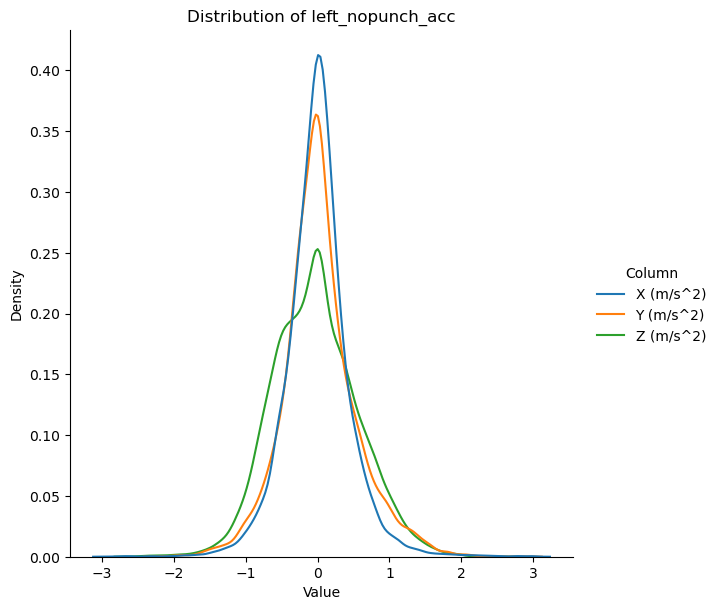

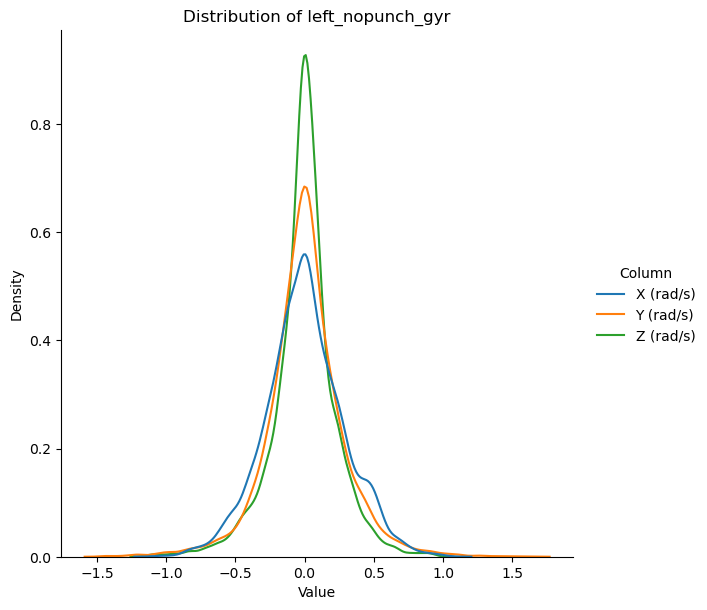

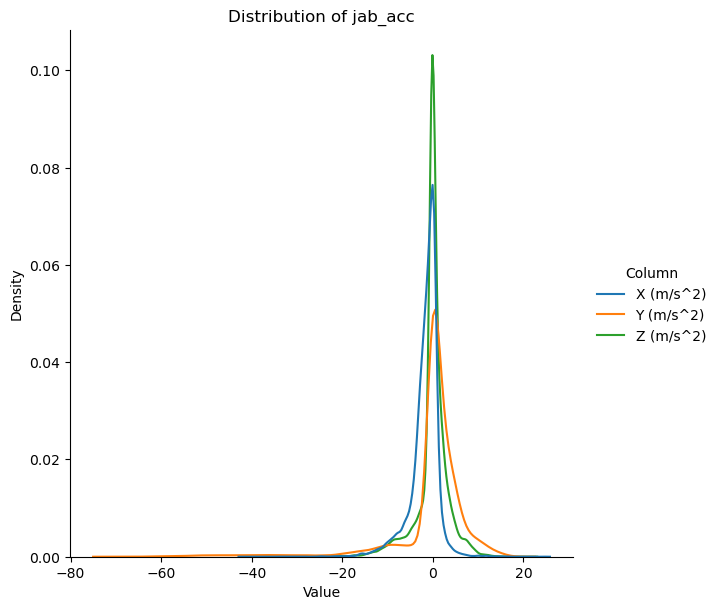

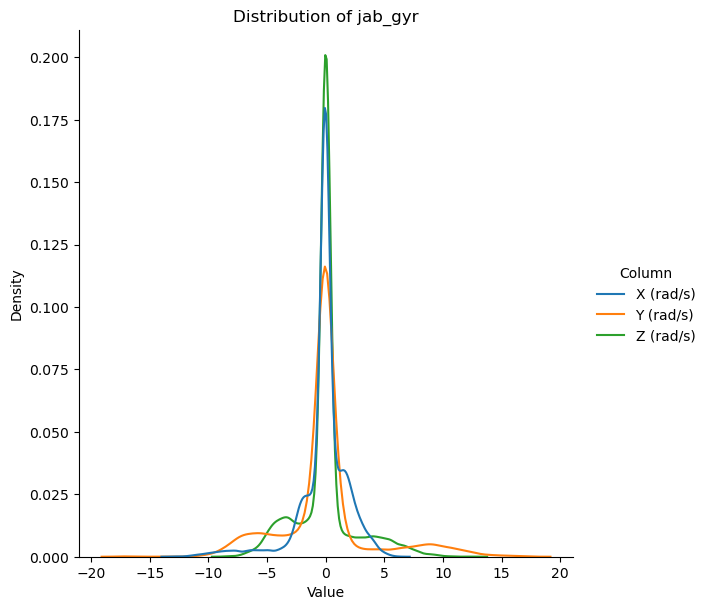

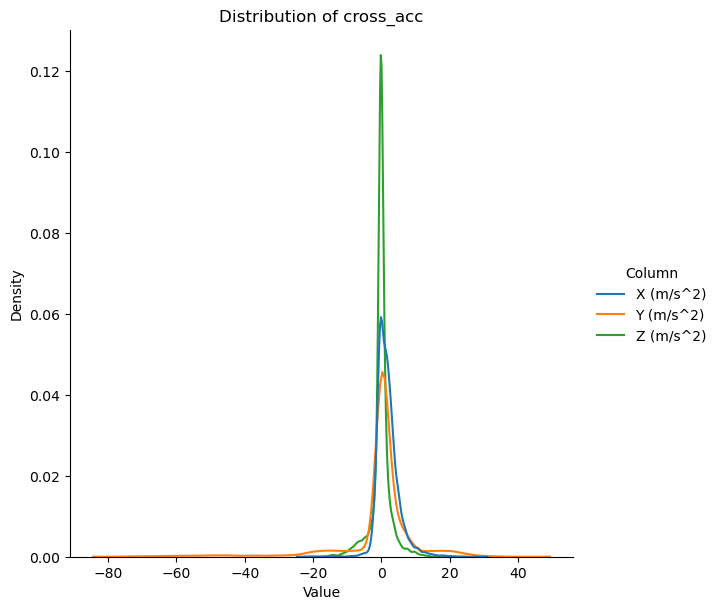

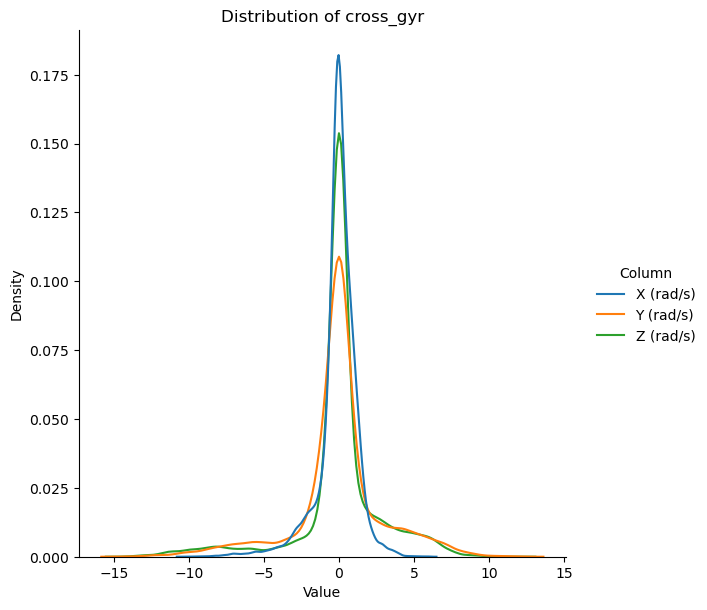

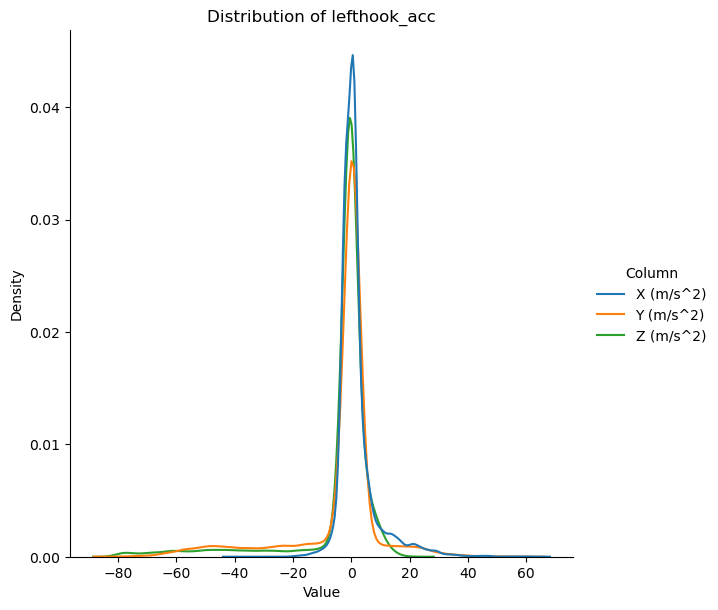

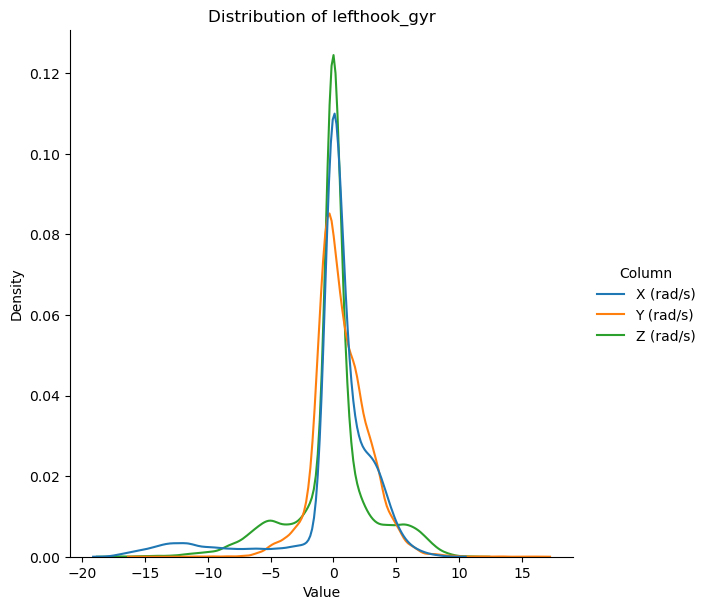

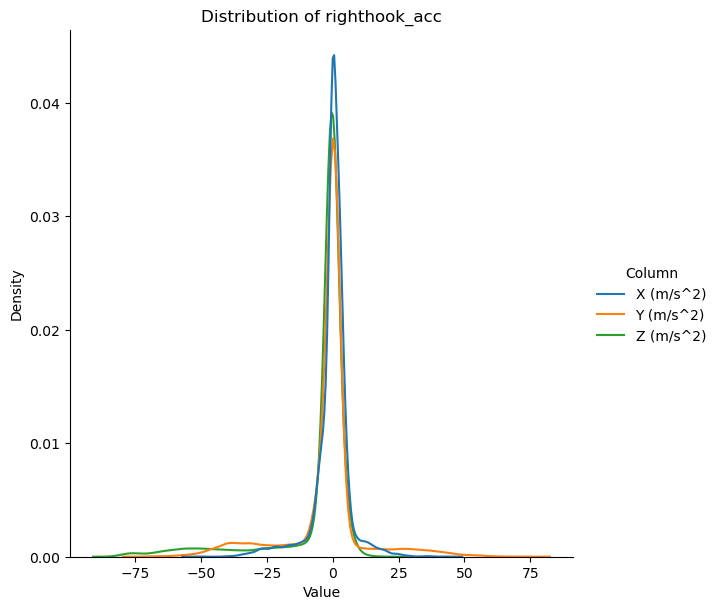

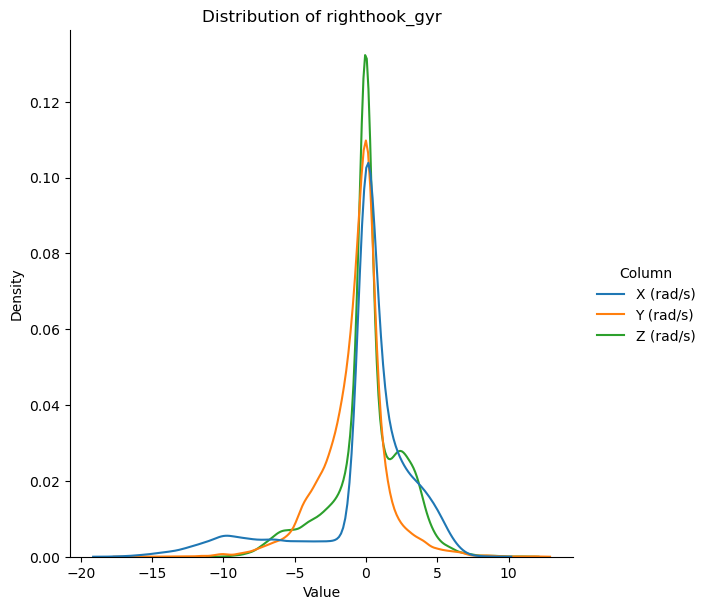

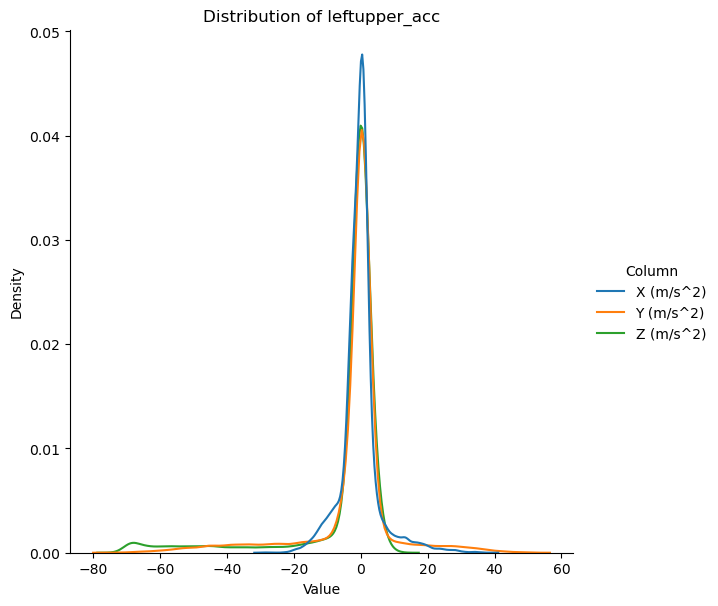

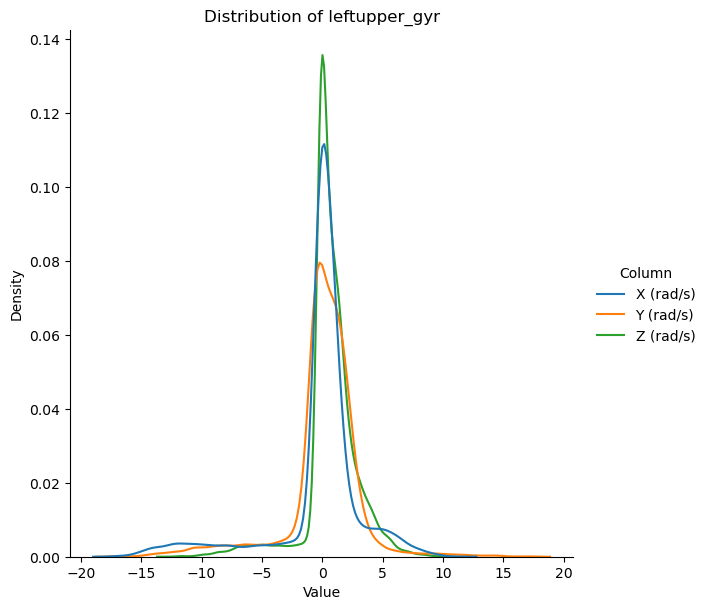

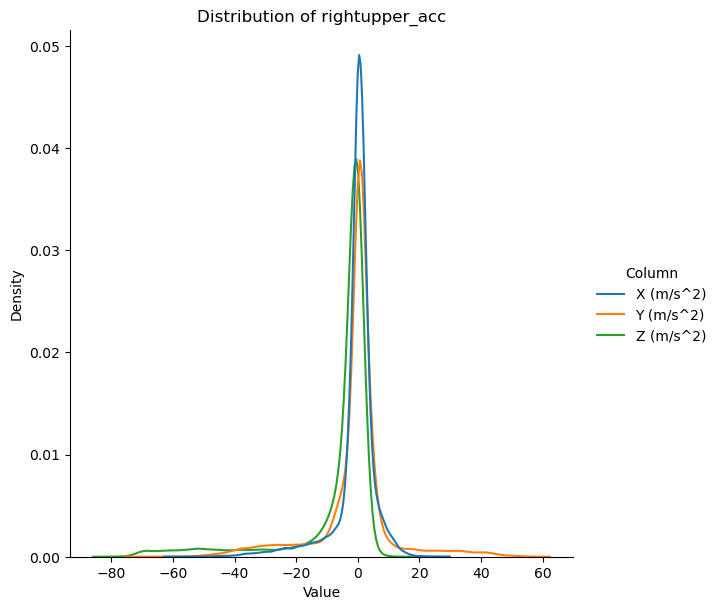

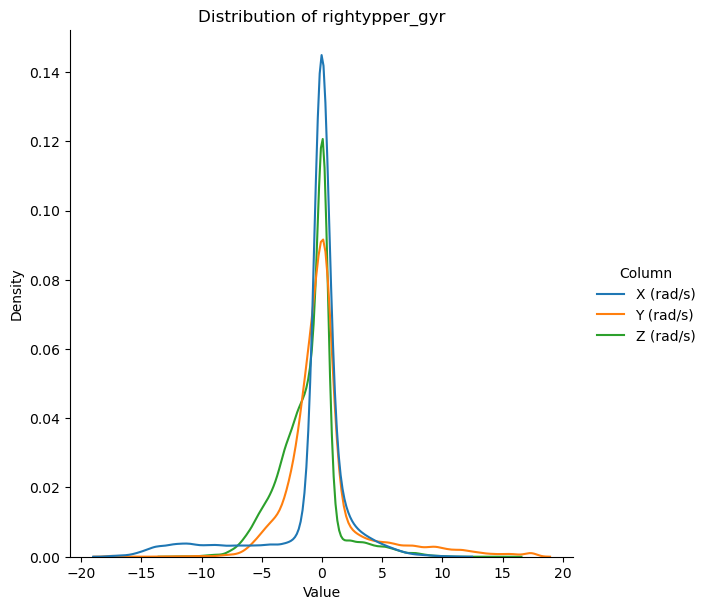

In [59]:
# Plot the distributions
for data in pre_data_no_time.keys():
    df_melted = pre_data_no_time[data].melt(var_name='Column', value_name='Value')

    sns.displot(df_melted, x='Value', hue='Column', kind='kde', height=6, aspect=1)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {data.replace("_noTime", "")}')
    plt.show()

In [62]:
# Look at acceleration per second for 5 seconds
# The jab
# Plot for X (m/s^2)

df_melted = pre_data_no_time["jab_"].melt(var_name="Direction", value_name="(m/s^2)")
sns.displot(df_melted, x="(m/s^2)", hue="Direction", kind="kde")

x = jab_acc["Time (s)"]
y_x = jab_acc["X (m/s^2)"]
y_y = jab_acc["Y (m/s^2)"]
y_z = jab_acc["Z (m/s^2)"]

for second in range(0,5):
    start = second * 250
    end = (second + 1) * 250
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    axs[0].plot(x[start:end], y_x[start:end], color='b')
    axs[0].set_title('Acceleration in X direction')
    axs[0].set_ylim(-100,100)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('X (m/s^2)')
    axs[0].grid(True)

    # Plot for Y (m/s^2)
    axs[1].plot(x[start:end], y_y[start:end], color='g')
    axs[1].set_title('Acceleration in Y direction')
    axs[1].set_ylim(-100,100)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Y (m/s^2)')
    axs[1].grid(True)

    # Plot for Z (m/s^2)
    axs[2].plot(x[start:end], y_z[start:end], color='r')
    axs[2].set_title('Acceleration in Z direction')
    axs[2].set_ylim(-100,100)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Z (m/s^2)')
    axs[2].grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(dirpath_savefig, f"Series of Acceleration of Jab in second {second + 1}"))
    plt.show()

KeyError: 'pre_jab_acc_noTime'